<a href="https://colab.research.google.com/github/Yunkoo-GIT/Programming/blob/main/20211006_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../data/BnW.png', cv2.IMREAD_GRAYSCALE)

connectivity = 8
num_labels, labelmap = cv2.connectedComponents(img, connectivity, cv2.CV_32S)

img = np.hstack((img, labelmap.astype(np.float32)/(num_labels -1)))
cv2.imshow('Connected components', img)
cv2.waitKey()
cv2.destroyAllWindows()

img = cv2.imread('../data/Lena.png', cv2.IMREAD_GRAYSCALE)
otsu_thr, otsu_mask = cv2.threshold(img, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

output = cv2.connectedComponentsWithStats(otsu_mask, connectivity, cv2.CV_32S)

num_labels, labelmap, stats, centers = output

colored = np.full((img.shape[0], img.shape[1], 3), 0, np.uint8)

for l in range(1, num_labels):
    if stats[l][4] > 200:
        colored[labelmap == l] = (0, 255*l/num_labels, 255*(num_labels-l)/num_labels)
        cv2.circle(colored,
                   (int(centers[l][0]), int(centers[l][1])), 5, (255, 0, 0), cv2.FILLED)
        
img = cv2.cvtColor(otsu_mask*255, cv2.COLOR_GRAY2BGR)

cv2.imshow('Connected components', np.hstack((img, colored)))
cv2.waitKey()
cv2.destroyAllWindows()

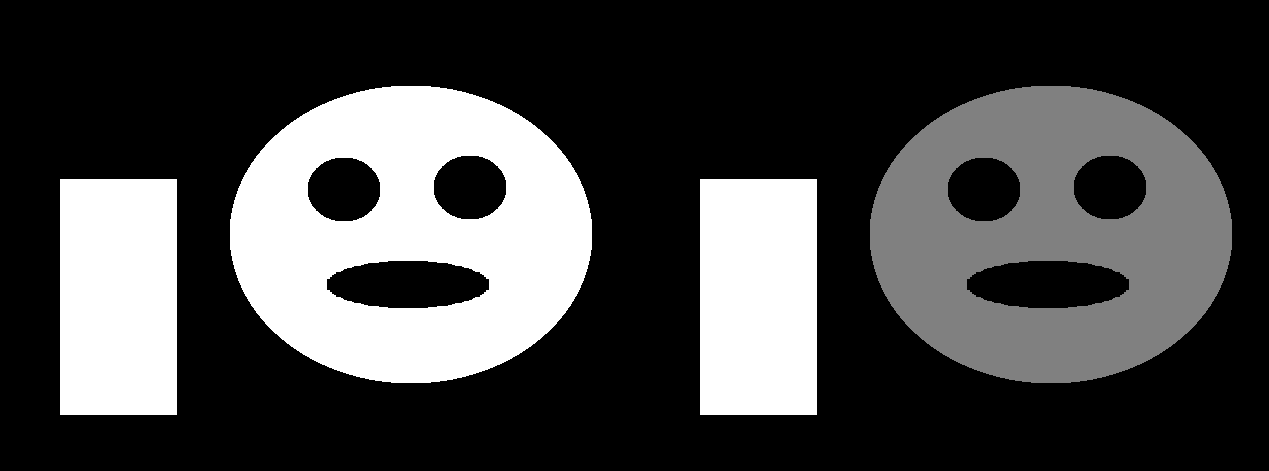

  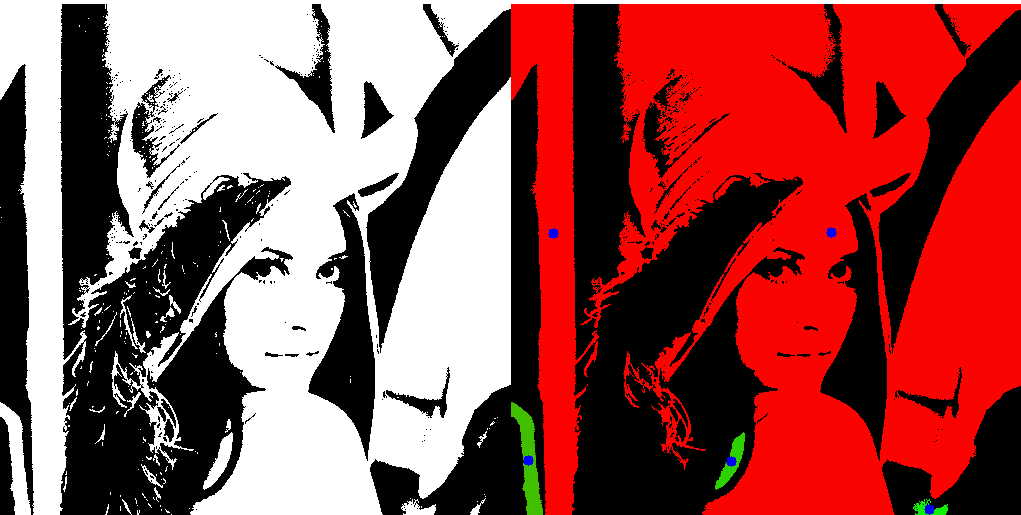